In [152]:
import numpy as np
from qiskit import QuantumCircuit
import math

# input your two numbers here
num1 = 15
num2 = 1

# input bit size of numbers. Put the samller bit size second
bit1 = 4
bit2 = 4

In [153]:
big_num = max(bit1,bit2)
small_num = min(bit1,bit2)
    
num1 = "{0:b}".format(num1)[::-1]
num2 = "{0:b}".format(num2)[::-1]

circuit_size = big_num + small_num + (big_num + 1) 

qc = QuantumCircuit(circuit_size)

# This part sets up the inputs and puts the X  gates
for i in range(big_num):
    if (len(num1) > i and num1[i] == '1'):
        qc.x(i)
    if (len(num2) > i and num2[i] == '1'):
        qc.x(i + bit1)
    
    

In [154]:
# This part calculates all of the carry bits 
for i in range(big_num):
    qc.x(i)
    qc.ccx(i, i + bit1 , i + (big_num  + small_num) + 1)
    qc.x(i)
    
    if i + 1< big_num:
        qc.mct([i + 1, i + bit1 + 1, i + (big_num  + small_num) + 1], i + (big_num  + small_num) + 2)


for i in range(big_num ):
    if bit2 < bit1: 
        qc.cx(i, i + (big_num + small_num))
        if i < small_num:
            qc.cx(i + bit1 , i + (big_num + small_num))
    else: 
        qc.cx(i+ bit1, i + (big_num + small_num))
        if i < small_num:
            qc.cx(i , i + (big_num + small_num))




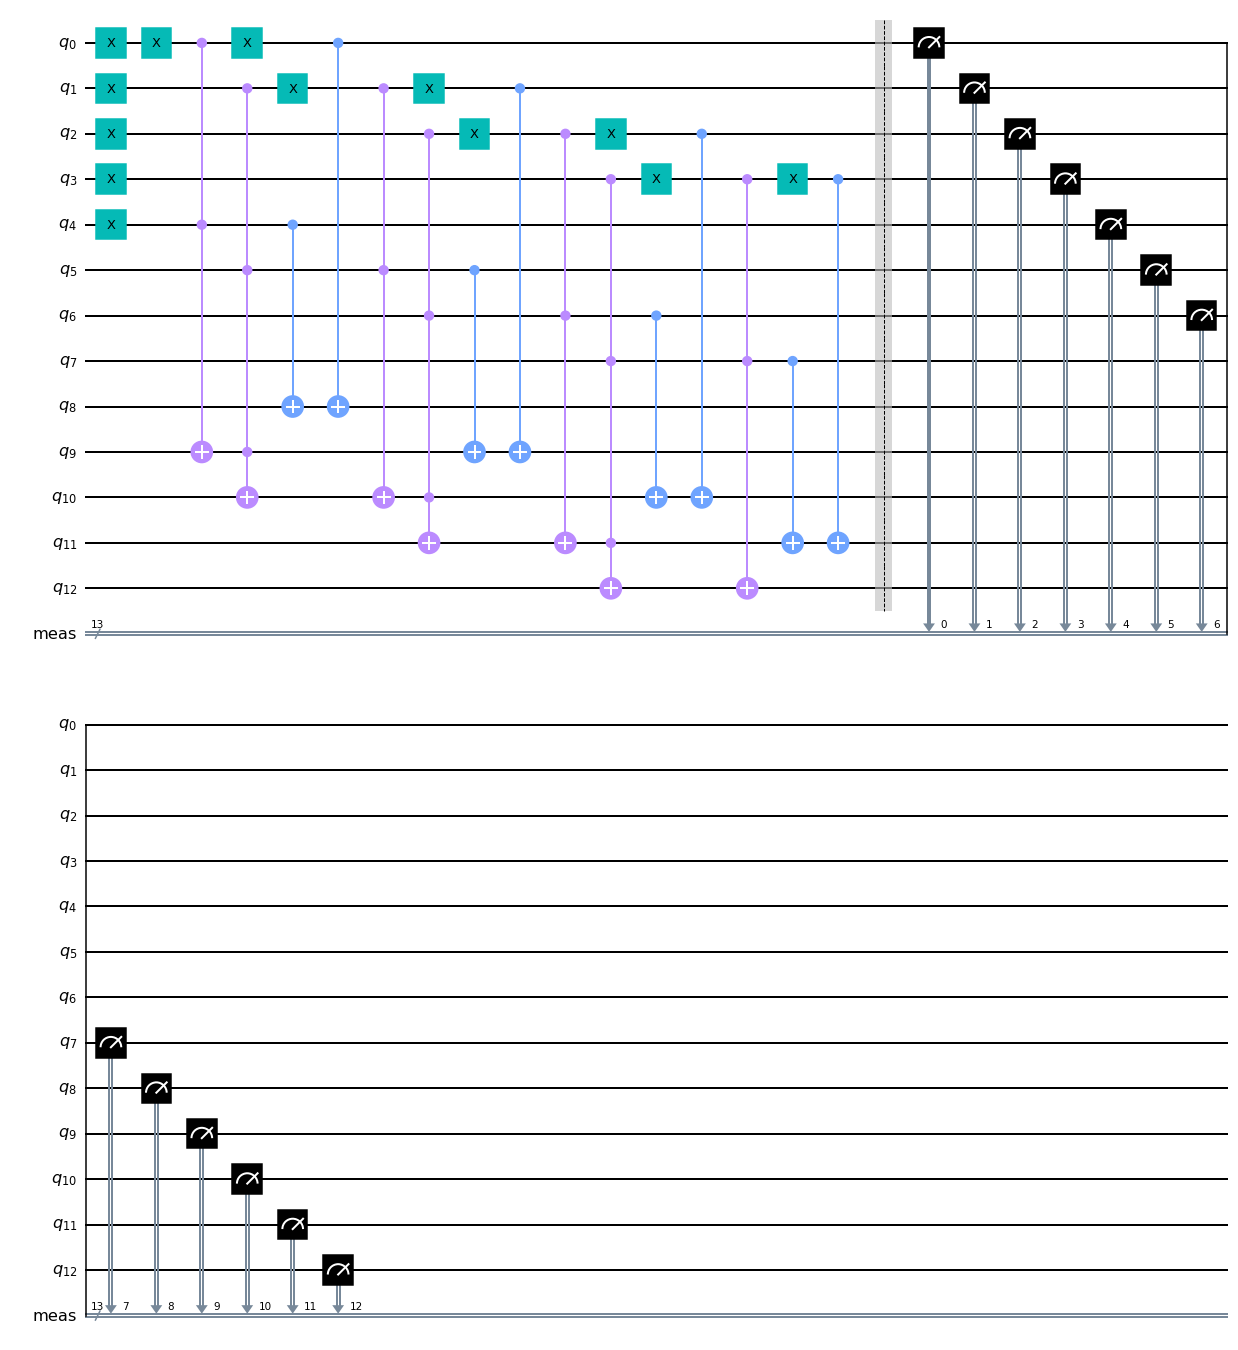

In [155]:
qc.measure_all()
qc.draw('mpl')

In [156]:
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile

# Use AerSimulator
from qiskit.providers.aer import AerSimulator

backend = AerSimulator()

# First we have to transpile the quantum circuit
# to the low-level QASM instructions used by the
# backend
qc_compiled = transpile(qc, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [157]:
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'0111000011111': 1024}


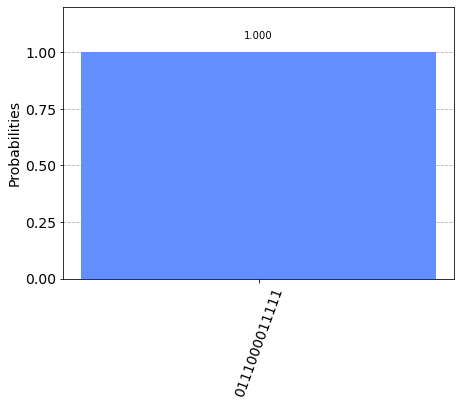

In [158]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)